#Задача: Классификация текста на 3 класса. признак target (0, 1, 2) его и нужно предсказать
##1) EDA - анализа данных.
	- показать разные статистики для ваших данных
	- визуализировать данные
	- очистить от мусора
	- новые фичи, которые вы придумаете
	- какие-нибудь инсайты

##2) embeddings:
	- one hot encoding
	- word2vec обученную (ссылку скину где достать обученную модель) / самим обучить
	- fasttext обученную / самим обучить
	- tf-idf
##3) ML-algorithms:
	- 2 простых алгоритма (SVM, LogReg, NaiveBayes)
	- random forest
	- decision tree
	- ансамбли мл алгоритмов (2) 
	- кросс-валидация
	- GridSearch для подбора гиперпараметров
##4) Нейронные сети:
	- Попробовать любую архитектуру из тех, что прошли на паре. (полносвязанная сетка, сверточная сетка или рекурентная)
	P.S.: Постарайтесь сделать подбор количества слоев(желательно сделать бы) и некоторых параметров(если захотите)
	
	
##Оценка: 8
Опционально:
	- Визуализация при помощи bokeh ваших эмбеддингов и попытка пояснить почему они именно такие
	- +1 алгоритм нейросетевой
Оценка: +2 балла

##Конечные результаты:
	- test.csv - требуется предсказать метки классов. 
	Файл должен состоять из двух колонок Id,Predicted
	Id - id записи
	Predicted - метка предсказанного класса
	Метки классов: 
	0, 1, 2

###P.S.: Не ленитесь пробуйте что-то интересное и новое. 
Может быть кто-то попробуем "POS-теги" или еще какие-либо интересные фишки и сможет их объяснить

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title,
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion matrix: " + title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import os
import re
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from wordcloud import WordCloud
from collections import Counter
import tqdm
from plotly import tools
import plotly.graph_objs as go
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb
import csv
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import collections
import traceback

#Данные


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_parquet("/content/drive/MyDrive/NLP/test.parquet")

In [ ]:
df_test.head()

Body  ...                                              Title
Id                                                           ...                                                   
46785369  I was given a decision tree with sample data i...  ...  Desecion trees ended up with same given tree a...
38908667  <p>I am moving a test application over to Xcod...  ...         Value of type 'Error' has no member 'code'
44703012  <p>I would like to be able to perform linting ...  ...  How do I lint Jenkins pipelines from the comma...
34910435  <p>I’m using <a href="https://github.com/ftlab...  ...  Is there a way to prevent fastclick from firin...
51632121  I have some 5 Test cases and I want them to ke...  ...          How to loop test cases in katalon Studio?

[5 rows x 3 columns]

In [ ]:
df_train = pd.read_parquet("/content/drive/MyDrive/NLP/train_t.parquet")
df_train.head()

Body  ... target
Id                                                           ...       
34862324  Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...  ...      2
47303682  While converting the data frame to HTML, Date ...  ...      2
46431243  <p>This should be an easy one, but somehow I c...  ...      0
45306324  <p>Let say I have a component in Angular 2 tha...  ...      0
49479547  <p>I'm setting a var using \n<code>set TEST_VA...  ...      1

[5 rows x 4 columns]

###Data preprocessiing

In [ ]:
print(df_train.isnull().sum())

Body      0
Tags      0
Title     0
target    0
dtype: int64


Почистим записи body от html тегов, также удалим все вставки с кодом


Далее проведем препроцессинг. В частности, приведем все слова к одному регистру (нижнему), удалим из него цифры и символы. После этого проведем лемматизацию и уберем из получившегося списка стоп слова.

Лемматизиция выйграла у стемминга за счет качества токенизации.

Стемминг - да, работает быстрее, однако лемматизация более качественно приводит слова к нормальной форме.


In [ ]:
df_train

Body  ... target
Id                                                           ...       
34862324  Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...  ...      2
47303682  While converting the data frame to HTML, Date ...  ...      2
46431243  <p>This should be an easy one, but somehow I c...  ...      0
45306324  <p>Let say I have a component in Angular 2 tha...  ...      0
49479547  <p>I'm setting a var using \n<code>set TEST_VA...  ...      1
...                                                     ...  ...    ...
35105793  I am trying to get the output at the end when ...  ...      2
51834929  <p>I am new to c++ and learning it. I am writi...  ...      1
48544786  <p>Ok, so I just installed latest version Symf...  ...      0
42013641  <p>I have a Python script with a Windows <code...  ...      0
49165927  <p>Is there a way to iterate through a hashmap...  ...      1

[10000 rows x 4 columns]

## ML models


### Random Forest

In [ ]:
def rf_grid_search(X, y, nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_leaf_nodes': [1, None], 'bootstrap': [True, False]}
    model=RandomForestClassifier()
    model_gscv = GridSearchCV(model, param_grid, cv=nfolds, n_jobs=10, verbose=2)
    model_gscv.fit(X, y)
    del model
    return model_gscv.best_params_

def rforest_classifier(X_train, X_test, y_train, y_test):

  best_params = rf_grid_search(X_train, y_train, 5)
  print(best_params)
  clf_forest = RandomForestClassifier(criterion=best_params["criterion"],max_leaf_nodes=best_params["max_leaf_nodes"], random_state=33, bootstrap=best_params["bootstrap"],verbose=1)
  clf_fitted = clf_forest.fit(X_train, y_train)
  prediction = clf_fitted.predict(X_test)
  print("Accuracy:", round(metrics.accuracy_score(y_test, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(y_test, prediction), 5))
  print(metrics.classification_report(y_test, prediction))   
  style.use('classic')
    
  plot_confusion_matrix(metrics.confusion_matrix(y_test, prediction),
                      target_names=['0', '1', '2'], title="Random forest",
                      normalize=False)
  del best_params
  del clf_fitted
  return clf_forest

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X, y, nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_features': ['auto', 'sqrt', 'log2']}
    dtree_model=DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_
  
def dtree_classifier(X_train, X_test, y_train, y_test):
  
  best_params = dtree_grid_search(X_train, y_train, 10)
  print(best_params)
  clf_tree = DecisionTreeClassifier(criterion=best_params["criterion"],max_features=best_params["max_features"], random_state=33)
  clf_fitted = clf_tree.fit(X_train, y_train)
  prediction = clf_fitted.predict(X_test)
  print(prediction)
  print("Accuracy:", round(metrics.accuracy_score(y_test, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(y_test, prediction), 5))
  print(metrics.classification_report(y_test, prediction))   
  style.use('classic')
  plot_confusion_matrix(metrics.confusion_matrix(y_test, prediction),
                      target_names=['0', '1', '2'],title="Decision tree",
                      normalize=False)
  del best_params
  del clf_fitted
  return clf_tree


###Naive Bayes

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

def nb_grid_search(X,Y):
  params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

  nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
  nb_grid.fit(X,Y)
  return nb_grid.best_params_

def naive_bayes(X_train, X_test, Y_train, Y_test):
  best_params = nb_grid_search(X_train, Y_train)
  nb = BernoulliNB(alpha=best_params["alpha"])
  nb_fitted = nb.fit(X_train, Y_train)
  nb_prediction= nb_fitted.predict(X_test)
  
  print("Accuracy:", round(metrics.accuracy_score(Y_test, nb_prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(Y_test, nb_prediction), 5))
  print(metrics.classification_report(Y_test, nb_prediction))   
  style.use('classic')

  plot_confusion_matrix(metrics.confusion_matrix(Y_test, nb_prediction),
                      target_names=['0', '1', '2'],title="Naive bayes",
                      normalize=False)
  del nb_prediction
  del best_params
  del nb_fitted
  return nb


### SVM

In [ ]:
def svm_grid_search(X, Y):
  parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [1, 2, 5, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
  svm_gscv = GridSearchCV(SVC(), parameters, scoring='accuracy', refit = True, verbose = 3)
  svm_gscv.fit(X, Y)
  return svm_gscv.best_params_

def svm(X_train, X_test, Y_train, Y_test):
  best_params = svm_grid_search(X_train, Y_train)
  svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
  svm_fitted = svm_model.fit(X_train, Y_train)
  svm_prediction = svm_model.predict(X_test)
  print("Accuracy:", round(metrics.accuracy_score(Y_test, svm_prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(Y_test, svm_prediction), 5))
  print(metrics.classification_report(Y_test, svm_prediction))   
  style.use('classic')

  plot_confusion_matrix(metrics.confusion_matrix(Y_test, svm_prediction), 
                      target_names=['0', '1', '2'],title="SVM",
                      normalize=False)
  # del best_params
  del svm_fitted
  del svm_prediction
  return svm_model

In [ ]:
!pip install catboost

###CatBoost

Не знаю как у других, но для нас первая ассоциация к словосочетанию "ансамбль алгоритмов" - это Random Forest. Вторая - CatBoost. Модный, молодой и мощный градиентный бустинг. Позже убедимся, что решение выбрать его не было напрасным 

In [ ]:
from catboost import CatBoostClassifier

def catboost_greed_search(X, Y):
  model = CatBoostClassifier()
  params = {'learning_rate': [0.01, 0.02, 0.05, 0.1], 'depth': [1, 2, 5, 10], 'iterations': [1, 2, 5, 10]}
  cb_gscv = GridSearchCV(CatBoostClassifier(), params, scoring='accuracy', refit = True)
  cb_gscv.fit(X,Y)
  print(cb_gscv.best_params_)
  return cb_gscv.best_params_

def catboost(X_train, X_test, Y_train, Y_test):
  best_params = catboost_greed_search(X_train, Y_train)
  cb_model = CatBoostClassifier(iterations=best_params['iterations'],
                          learning_rate=best_params['learning_rate'],
                          depth=best_params['depth'])
  cb_fitted = cb_model.fit(X_train, Y_train)
  cb_prediction = cb_model.predict(X_test)
  print("Accuracy:", round(metrics.accuracy_score(Y_test, cb_prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(Y_test, cb_prediction), 5))
  print(metrics.classification_report(Y_test, cb_prediction))   
  style.use('classic')

  plot_confusion_matrix(metrics.confusion_matrix(Y_test, cb_prediction),
                      target_names=['0', '1', '2'], title="CatBoost", normalize=False)
  del best_params
  del cb_fitted
  del cb_prediction
  return cb_model

###XGBOOST
Признан одним из самых эффективных алгоритмов классического ML для процессинга текста, но и самым долгим. Он использует методы градиентного бустинга вместе с множеством дополнительных трюков, которые делают обучение намного более эффективным

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

def xgboost_greed_search(X, Y):
  params =  {'max_depth':[1, 2, 5, 10, 20], 'learning_rate':[0.1, 0.2, 0.5, 1, 2], 'n_estimators':[10, 20, 50, 100, 200]}

  xg_gscv = GridSearchCV(XGBClassifier(), params, scoring='accuracy', refit = True)
  xg_gscv.fit(X,Y)
  print(xg_gscv.best_params_)
  return xg_gscv.best_params_

def xgboost(X_train, X_test, Y_train, Y_test):
  best_params = xgboost_greed_search(X_train, Y_train)
  xg_model = XGBClassifier(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], n_estimators =best_params['n_estimators'])
  xg_fitted = xg_model.fit(X_train, Y_train)
  xg_prediction = xg_model.predict(X_test)
  print("Accuracy:", round(metrics.accuracy_score(Y_test, xg_prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(Y_test, xg_prediction), 5))
  print(metrics.classification_report(Y_test, xg_prediction))   
  style.use('classic')

  plot_confusion_matrix(metrics.confusion_matrix(Y_test, xg_prediction),
                      target_names=['0', '1', '2'], title="XGBOOST",
                      normalize=False)
  del xg_fitted
  del best_params
  del xg_prediction
  return xg_model

### VOTING ENSEMBLE

А вот и бонус: Кастомный ансамбль. Он берет результаты всех предыдущих классификаторов, даже ансамблей, после чего объединяет результаты. Был выбран Soft voting, он будет использовать метод взвешенных вероятностей

In [ ]:
from sklearn.ensemble import VotingClassifier
def voting_classifier(dt: DecisionTreeClassifier, rf:RandomForestClassifier, xg: XGBClassifier, cb: CatBoostClassifier, X_train, X_test, Y_train, Y_test):

  estimators=[]
  estimators.append(('dt1', dt))
  estimators.append(('cb1', cb))
  estimators.append(('xg1', xg))
  estimators.append(('rf1', rf))

  vc = VotingClassifier(estimators, voting='hard')

  vc_fitted = vc.fit(X_train, Y_train)
  prediction = vc_fitted.predict(X_test)
  print(prediction)
  print("Accuracy:", round(metrics.accuracy_score(Y_test, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(Y_test, prediction), 5))
  print(metrics.classification_report(Y_test, prediction))   
  style.use('classic')
  plot_confusion_matrix(metrics.confusion_matrix(Y_test, prediction),
                      target_names=['0', '1', '2'],title="Voting enseble",
                      normalize=False)
  del estimators
  del vc
  del vc_fitted
  del prediction

Было принято решение отказаться от бэггинга, поскольку все сайты и здравый смысл в один голос кричат, что бустинг, который обучается итеративно, намного качественнее, нежели параллельный бэггинг. Просто берем все результаты и усредняем результаты. А зачем нам неэффективный и такой простой алгоритм, правильно?

## EDA

### data process

In [ ]:
import nltk
import string
import re
import time
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from multiprocessing import Process
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess(df, name):


  # remove code from message
  def rm_code(row):
    return re.sub(r'<code>(?s).*</code>', '', row)

  # remove html tags
  def cleanhtml(raw_html):
    return re.sub(r'<.*?>', ' ', raw_html)

  # clean special characters
  def clean_cc(raw_row):
    return re.sub(r'[^A-Za-z]', ' ', raw_row)

  # tokenize string
  def tokenize(input_str):
    return word_tokenize(input_str)
  
  # removes words from stop-list
  def remove_stop_words(word_list):
      stop_words = set(stopwords.words('english'))
      word_list = [i for i in word_list if not i in stop_words]
      return word_list

  # stemming
  def stem(word_list):
      stemmer = PorterStemmer()   
      stems = [stemmer.stem(word) for word in word_list] 
      return stems

  # lemmatization
  def lemmatize(word_list):

    def __get_wordnet_pos(word):
      """Map POS tag to first character lemmatize() accepts"""
      tag = nltk.pos_tag([word])[0][1][0].upper()
      tag_dict = {"J": wordnet.ADJ,
                  "N": wordnet.NOUN,
                  "V": wordnet.VERB,
                  "R": wordnet.ADV}
      return tag_dict.get(tag, wordnet.NOUN)

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = list()
    for word in word_list:
        lemmatized_words.append(lemmatizer.lemmatize(word, __get_wordnet_pos(word)))
    return lemmatized_words

  #main entry point
  def process_string(input_str):
    lower_str = input_str.lower().strip()
    word_tokenized = tokenize(lower_str)
    lemmatized = lemmatize(word_tokenized)
    clean_list = remove_stop_words(lemmatized)
    final_list =  set(clean_list)
    return  " ".join([c for c in final_list])
      
  def process_body(list_val):
    start = time.time()
    for i in range(len(df)):
        list_val.append(process_string(str(df.iloc[i,0])))
    end = time.time()
    print(f"DESCRIPTION EXEC TIME: {end - start}")
    print("DESCRIPTION FINISHED")

  def process_title(list_val):
      start = time.time()
      for i in range(len(df)):
          list_val.append(process_string(str(df.iloc[i,2])))
      end = time.time()
      print(f"TITLES EXEC TIME: {end - start}")
      print("TITLES FINISHED")

  def process_tags(list_val):
    start = time.time()
    for i in range(len(df)):
        list_val.append(process_string(str(df.iloc[i,1])))
    end = time.time()
    print(f"TAGS EXEC TIME: {end - start}")
    print("TAGS FINISHED")

  

  df["Body"] = df["Body"].apply(rm_code)
  df["Body"] = df["Body"].apply(cleanhtml)
  df["Body"] = df["Body"].apply(clean_cc)
  df["Tags"] = df["Tags"].apply(clean_cc)
  df["Title"] = df["Title"].apply(clean_cc)


  processed_title = []
  processed_body = []
  processed_tags = []

  process_body(processed_body)
  process_title(processed_title)
  process_tags(processed_tags)

  df["Processed_body"] = processed_body
  df["Processed_body"] = df["Processed_body"] + processed_title
  df["Processed_tags"] = processed_tags
  df = df.drop(["Body","Title", "Tags"], axis = 1)
  df.to_csv (f'processed_{name}.csv', index = False, header=True)
  return df

def feature_engeneereing(dataset, name):

  ## Number of words in the text ##
  dataset["num_words"] = dataset["Processed_body"].apply(lambda x: len(str(x).split()))

  ## Number of unique words in the text ##
  dataset["num_unique_words"] = dataset["Processed_body"].apply(lambda x: len(set(str(x).split())))

  ## Number of characters in the text ##
  dataset["num_chars"] = dataset["Processed_body"].apply(lambda x: len(str(x)))

  ## Average length of the words in the text ##
  dataset["mean_word_len"] = dataset["Processed_body"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

  ## Number of tags in the text##
  dataset["number_of_tags"] = dataset["Processed_tags"].apply(lambda x : len(str(x).split()))

  ## Ofthen when we ask question on StackOverflow when adding tags - at first we add the main and most important one
  # dataset['first_tag'] = dataset['Processed_tags'].str.partition(' ')[0]

  return dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#df_train = preprocess(df_train, "train")
# df_test = preprocess(df_test, "test")

df_train = pd.read_csv('processed_train.csv')
df_test = pd.read_csv('processed_test.csv')

df_train = feature_engeneereing(df_train, 'train')
df_test = feature_engeneereing(df_train, 'test')
df_train

DESCRIPTION EXEC TIME: 578.4643342494965
DESCRIPTION FINISHED
TITLES EXEC TIME: 84.45478773117065
TITLES FINISHED
TAGS EXEC TIME: 46.59007811546326
TAGS FINISHED


target  ... number_of_tags
0           2  ...              3
1           2  ...              3
2           0  ...              4
3           0  ...              3
4           1  ...              4
...       ...  ...            ...
47995       1  ...              5
47996       1  ...              3
47997       0  ...              5
47998       0  ...              1
47999       2  ...              4

[48000 rows x 8 columns]

In [ ]:
df_train.Processed_tags = df_train.Processed_tags.fillna('-')
df_train['text'] = df_train.Processed_body + df_train.Processed_tags
df_train = df_train.drop(['Processed_tags','Processed_body'], axis = 1 )

In [ ]:
df_test.Processed_tags = df_test.Processed_tags.fillna('-')
df_test['text'] = df_test.Processed_body + df_test.Processed_tags
df_test = df_test.drop(['Processed_tags','Processed_body'], axis = 1 )

In [ ]:
df_train_nn = df_train.copy()

### Info plots

In [ ]:
df_train.isnull().sum()

target              0
num_words           0
num_unique_words    0
num_chars           0
mean_word_len       0
number_of_tags      0
text                0
dtype: int64

<function matplotlib.pyplot.show>

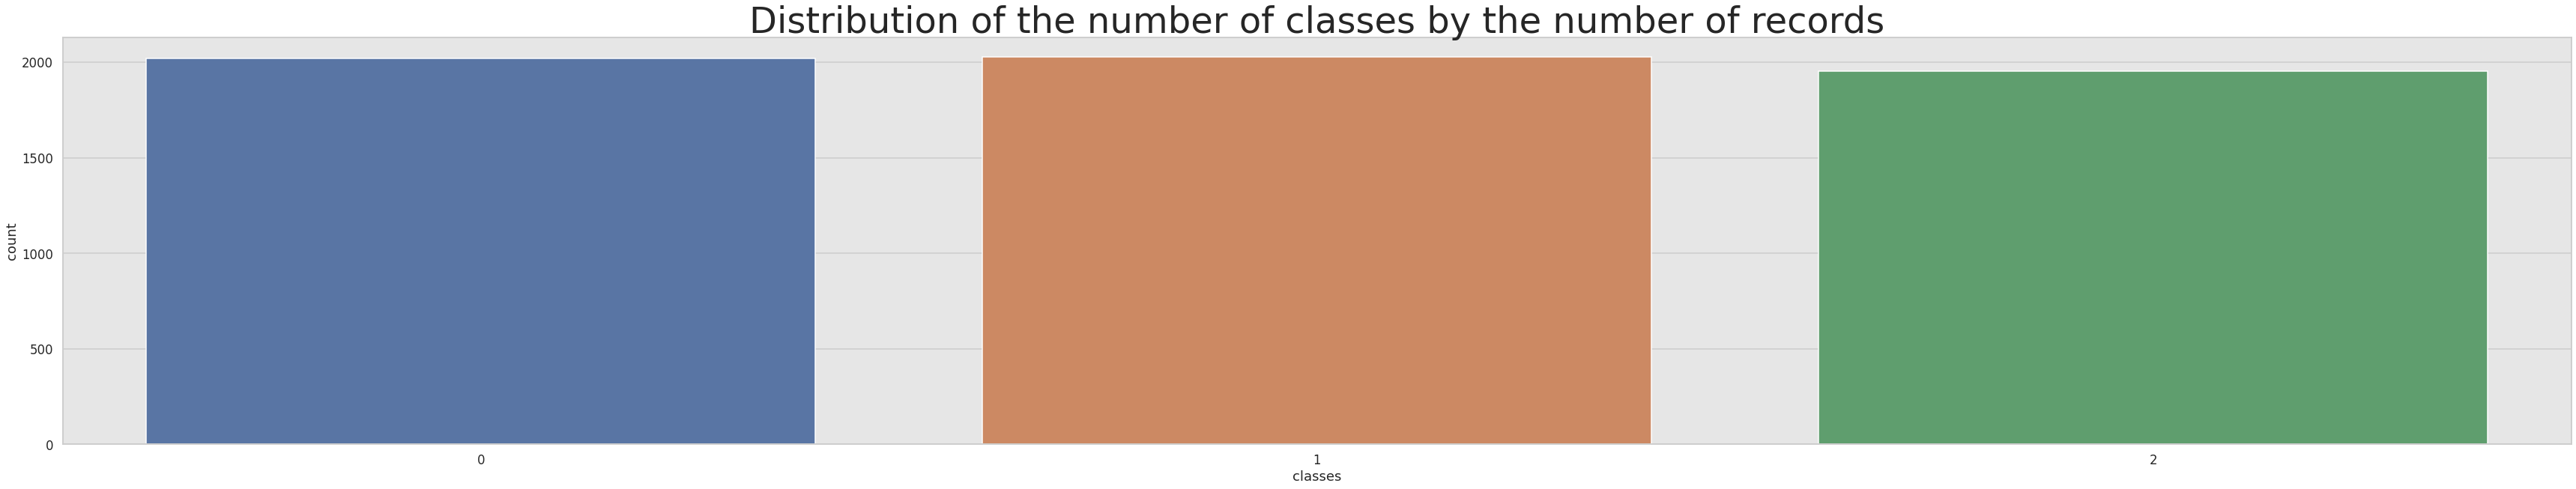

In [ ]:
sns.set(font_scale=4)
plt.figure(figsize= (60, 10))
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
ax = sns.countplot(x='target', data= df_train)
ax.set_xlabel('classes')
ax.set_xticklabels(ax.get_xticklabels())
sns.set(font_scale=4)
ax.set_title('Distribution of the number of classes by the number of records')
plt.show

Classes destribution. Here we can see how many records for each class dataset has.

<function matplotlib.pyplot.show>

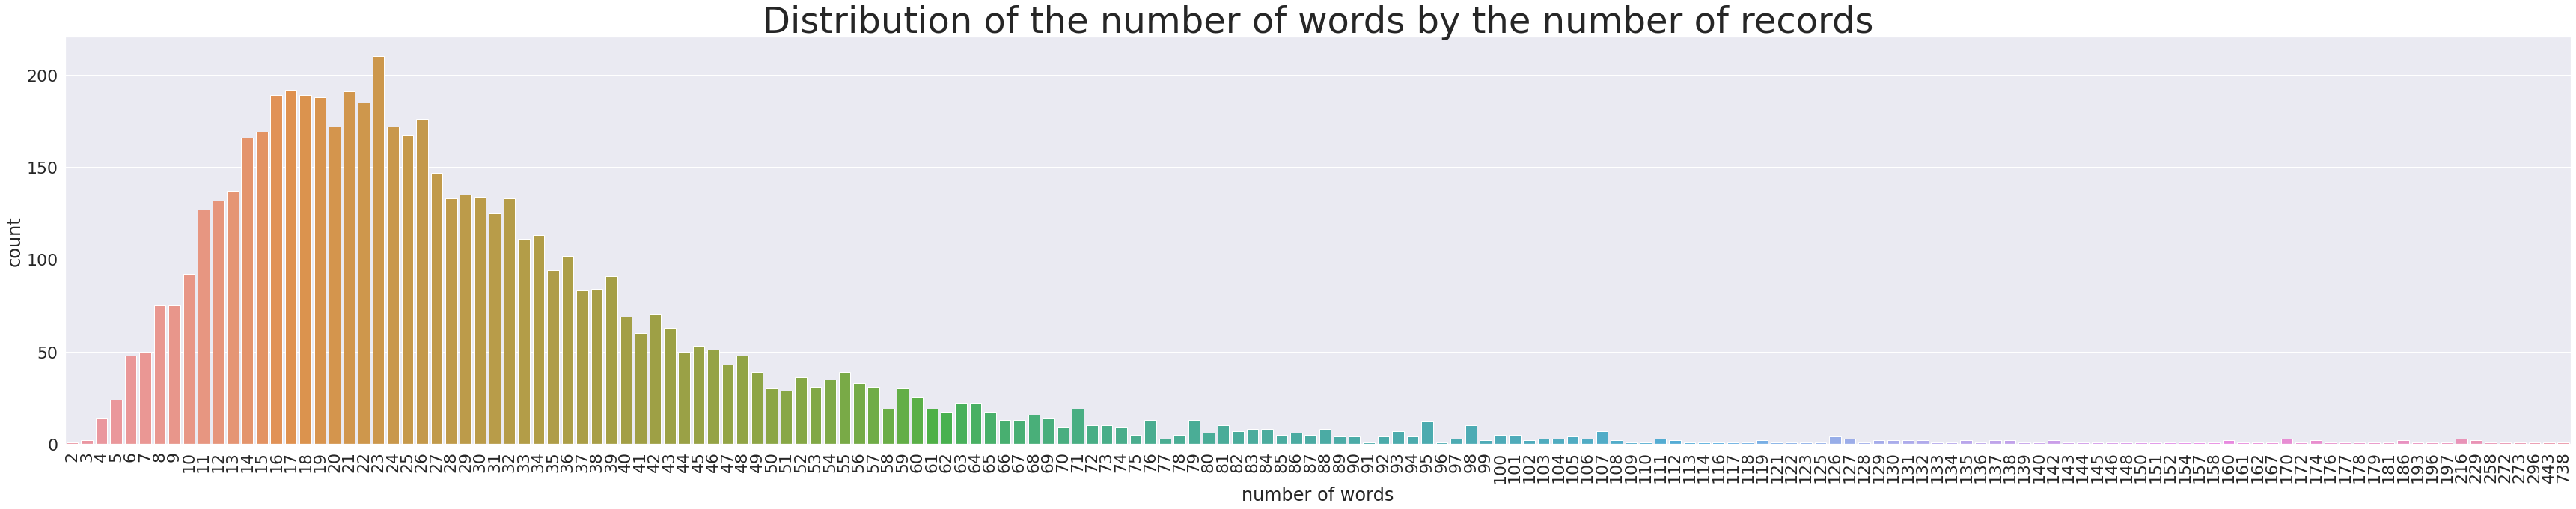

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize= (60, 10))
ax = sns.countplot(x='num_words',data= df_train)
sns.set(font_scale = 10)
ax.set_xlabel('number of words')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale=4)
ax.set_title('Distribution of the number of words by the number of records')
plt.show

<function matplotlib.pyplot.show>

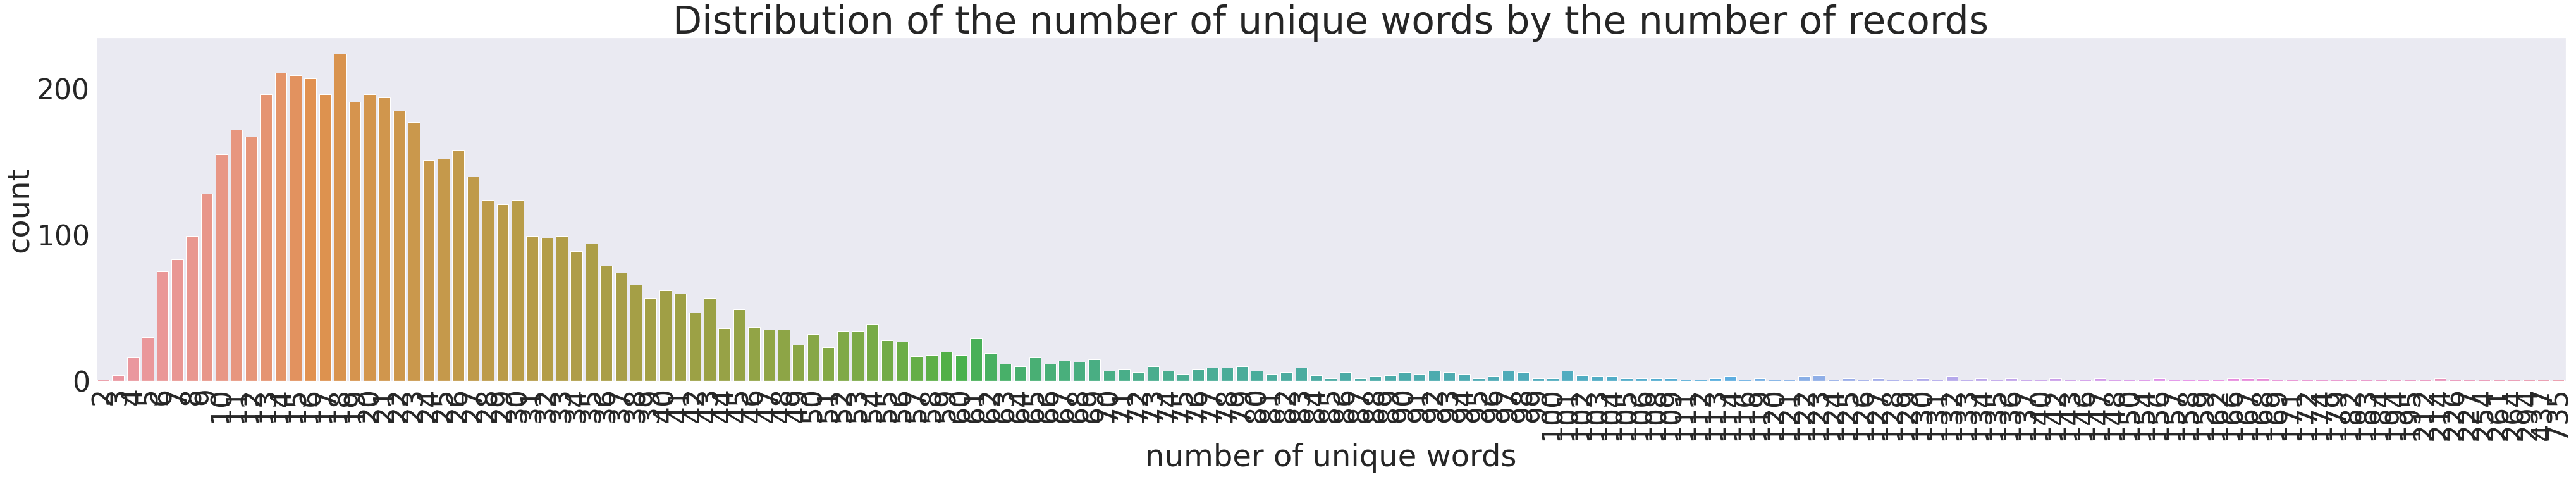

In [ ]:
sns.set(font_scale=4)
plt.figure(figsize= (70, 10))
ax = sns.countplot(x='num_unique_words', data= df_train)
ax.set_xlabel('number of unique words')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale=5)
ax.set_title('Distribution of the number of unique words by the number of records')
plt.show

Here we can see count of unique words in records. Maybe it could be useful in nn

In [ ]:
sns.set(font_scale=16)
plt.figure(figsize= (300, 100))
ax = sns.countplot(x='num_chars', data= df_train)
ax.set_xlabel('number of symbols')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale=17)
ax.set_title('Distribution of the number of symbols in tokenized words by the number of records')
plt.show

<function matplotlib.pyplot.show>

This plot shows destribution of chars number by each record. 
This plot is for fun:)

<function matplotlib.pyplot.show>

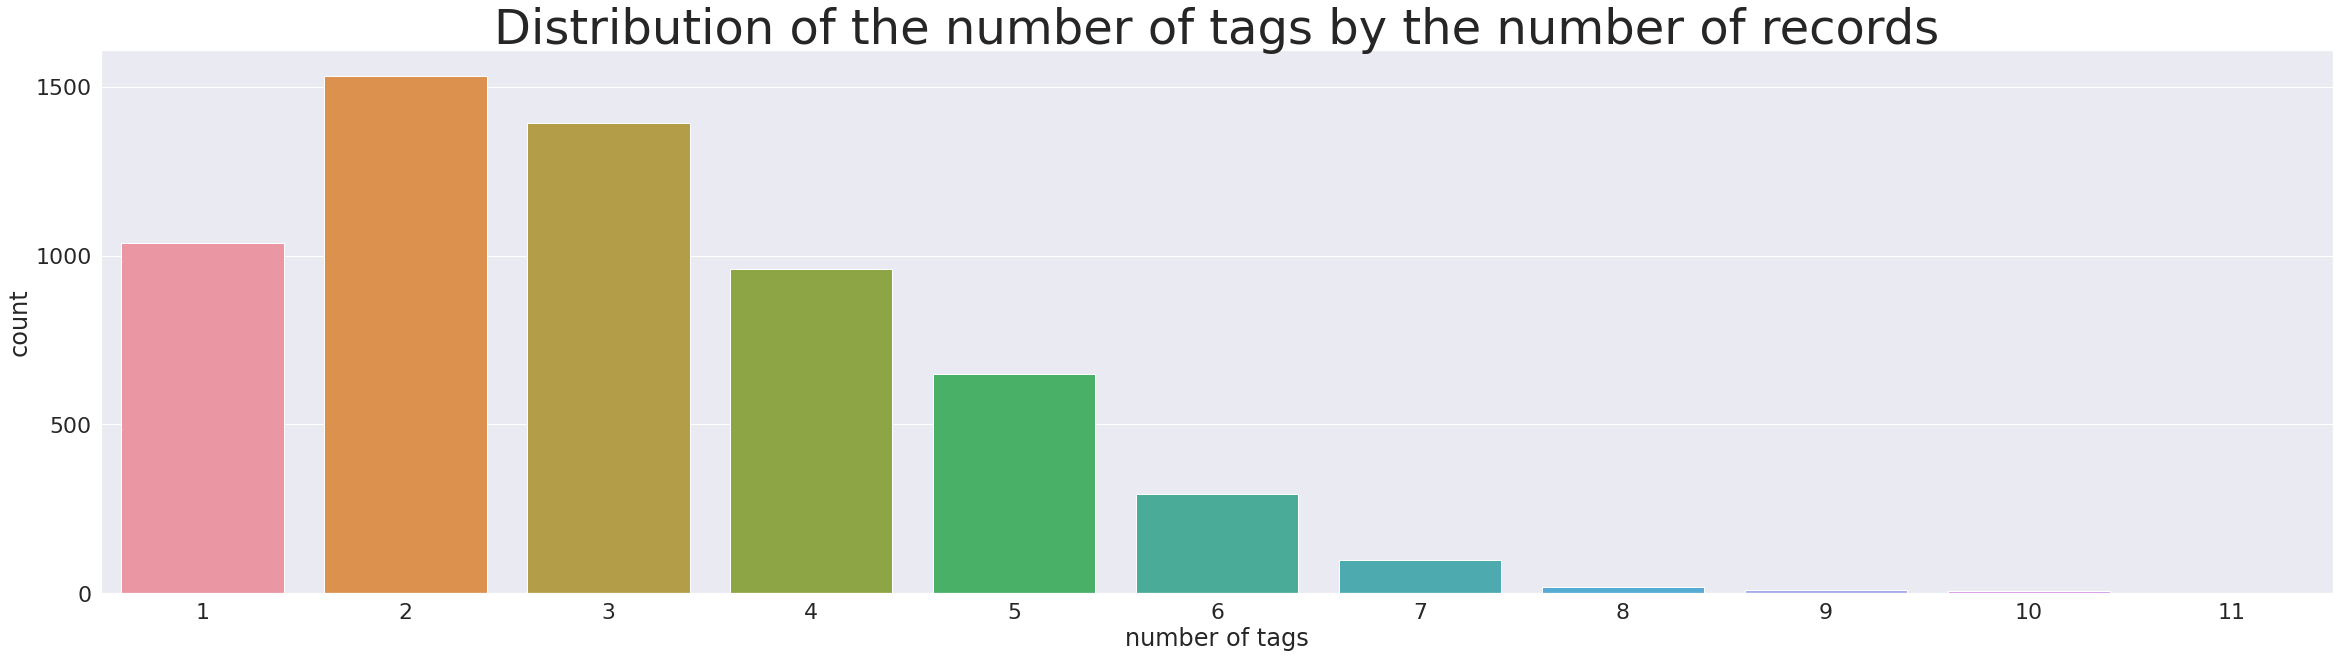

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize= (40, 10))
ax = sns.countplot(x='number_of_tags', data= df_train)
ax.set_xlabel('number of tags')
sns.set(font_scale=4)
ax.set_title('Distribution of the number of tags by the number of records')
plt.show

Here we can see how many records have each number of records

In [ ]:
#lets plot popular for NLP EDA wordclouds with stop words because we are not going to delete them
def word_clouds(size, df, class_target):
    plt.figure(figsize=size)
    word_cloud = WordCloud(max_words=800, width=1500, height=1000).generate(" ".join(df[df['target'] == class_target].text))
    plt.imshow(word_cloud , interpolation = 'bilinear')

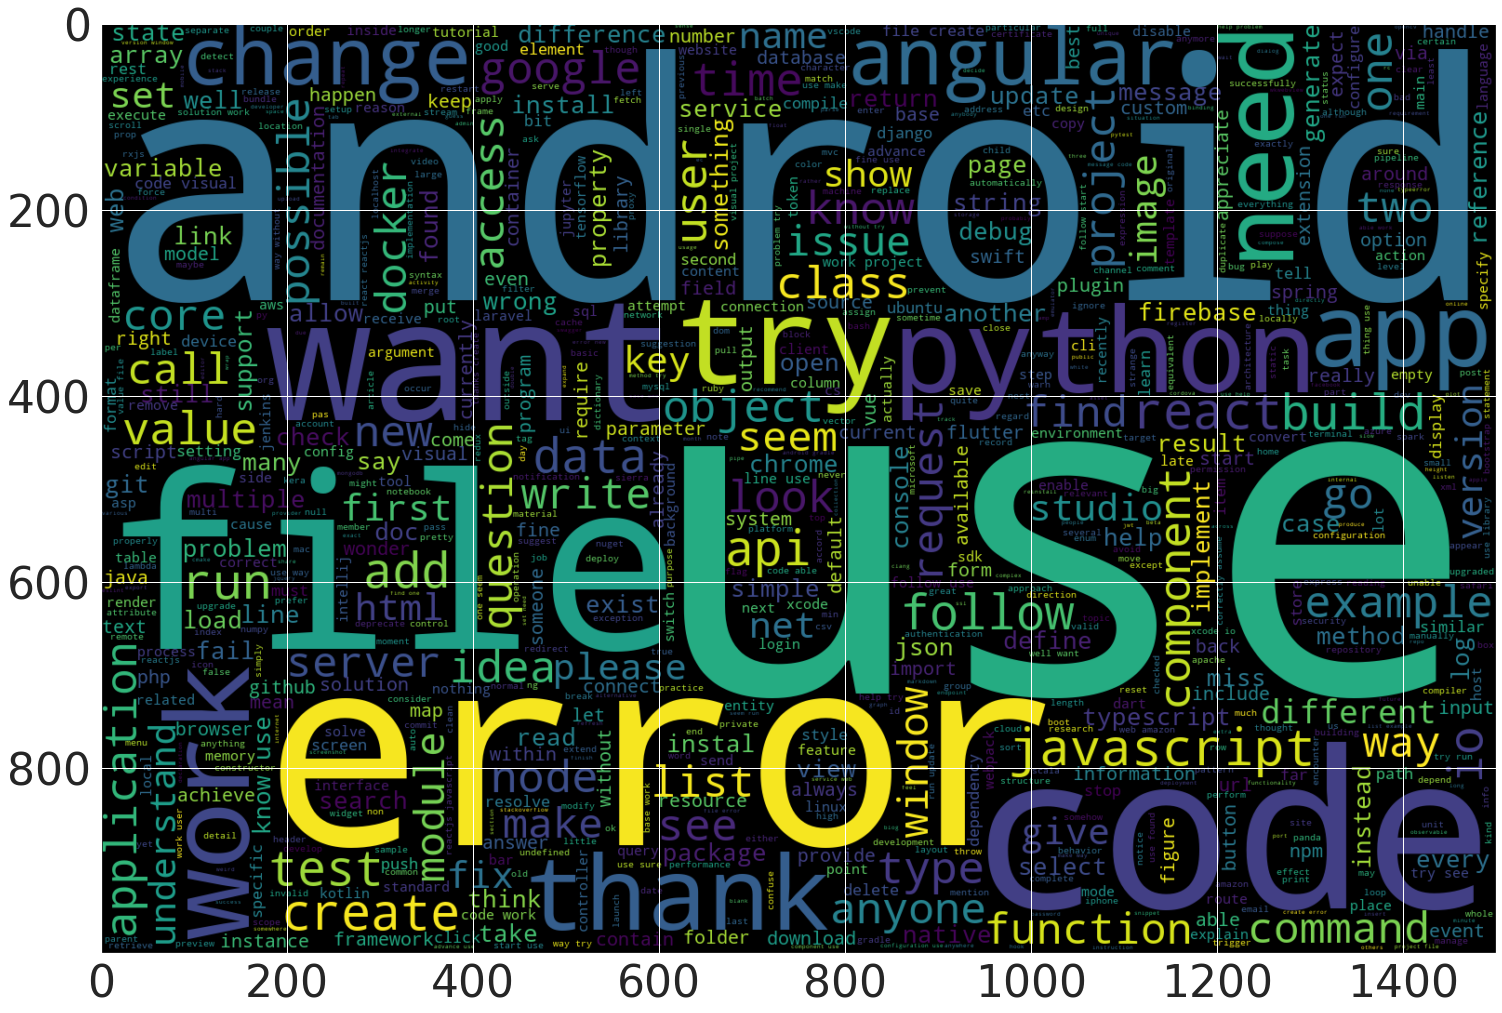

In [ ]:
word_clouds((25,25), df_train, 0)

Funny thing, no practical use but just beautiful)

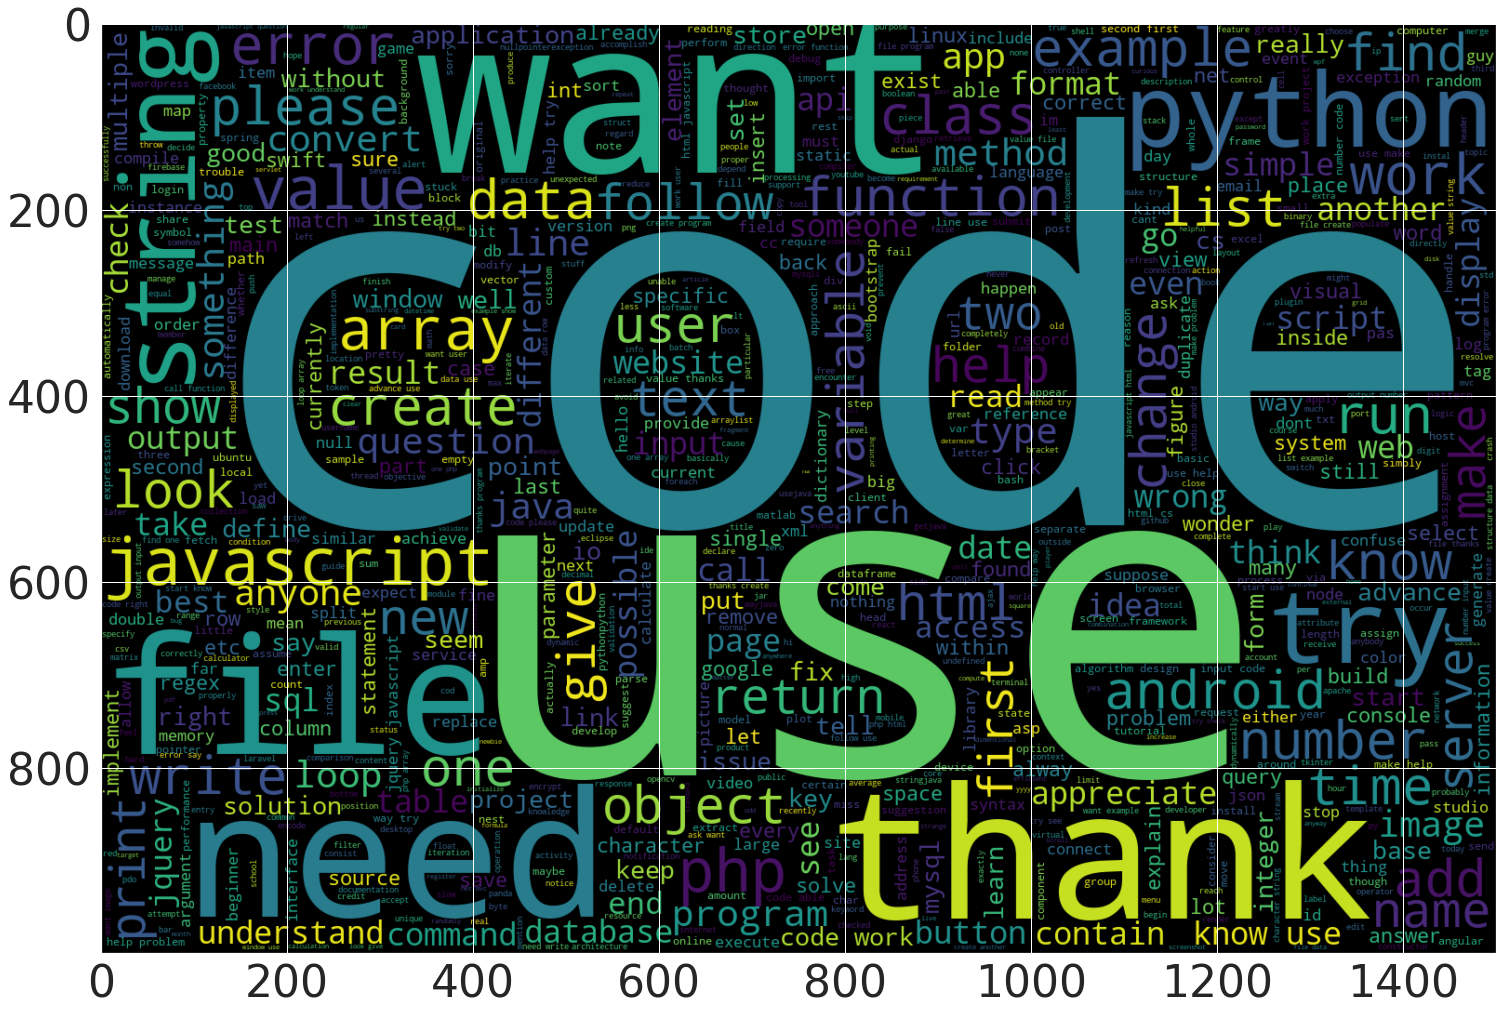

In [ ]:
word_clouds((25,25), df_train, 1)

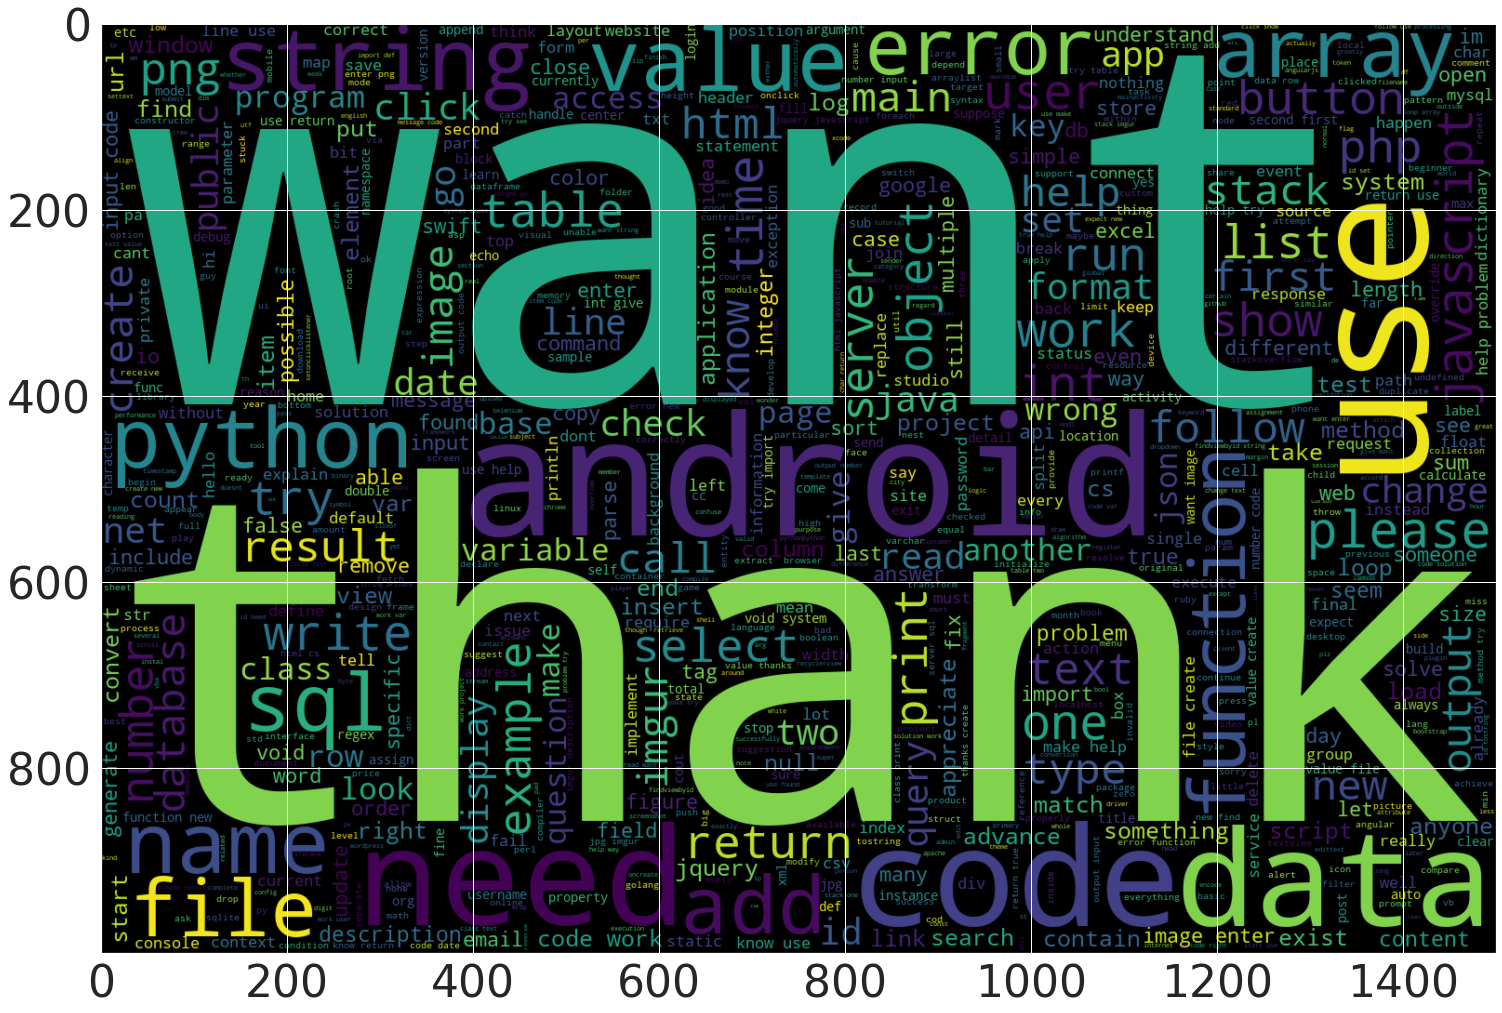

In [ ]:
word_clouds((25,25), df_train, 2)

In [ ]:
# lets show common words for each class (with most appearance)
def common_words(df, class_type):
    df['temp_list'] = df['text'].apply(lambda x:str(x).split())

    top = Counter([item for sublist in df['temp_list'].loc[df['target'] == class_type] for item in sublist])
    top_class = pd.DataFrame(top.most_common(15))
    top_class.columns = ['words','count_words']

    fig = px.bar(top_class, x='count_words',y='words',title=f'Common words in class {class_type}',orientation='h',width=800,height=700,color='words')
    fig.show()

In [ ]:
common_words(df_train, 0)

In [ ]:
common_words(df_train, 1)

In [ ]:
common_words(df_train, 2)

На разных графиках мы видим одинаковые результаты

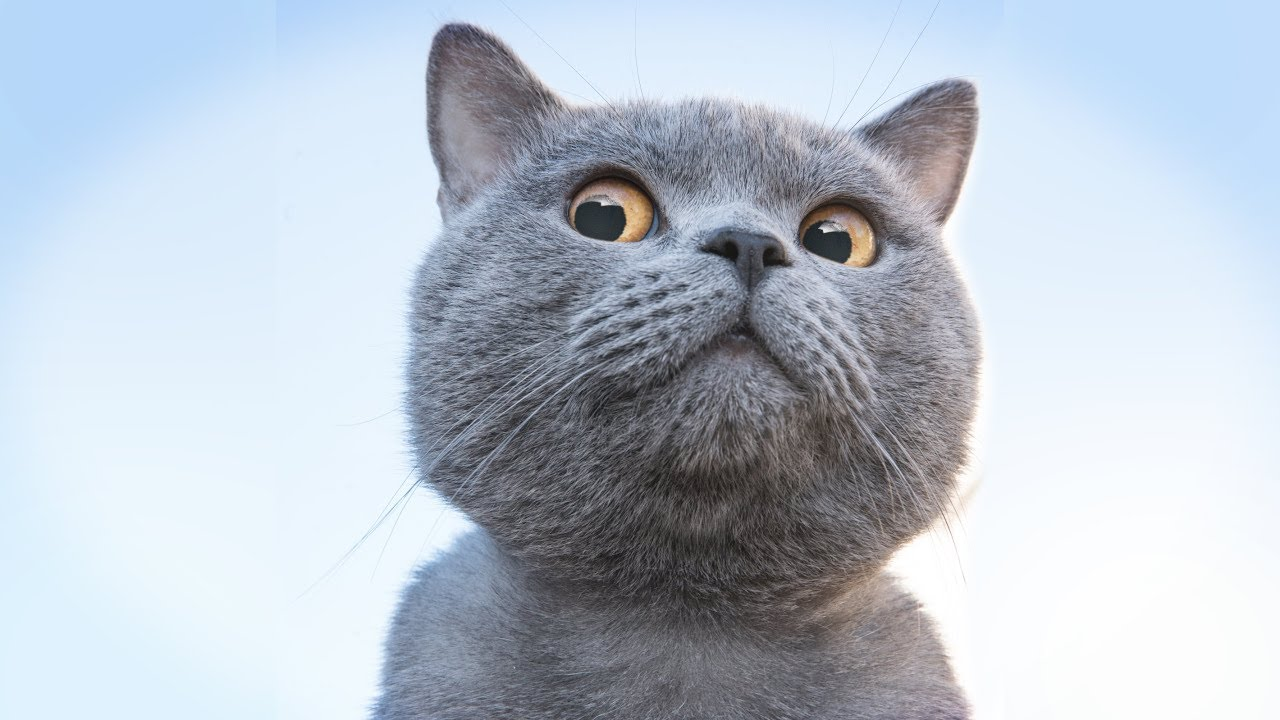




## Each algo on each embedding

###TFIDF (trained of full dataset)

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_tfidf(df):
  v = TfidfVectorizer(min_df=5)
  tf_idf_matrix = v.fit_transform(df.text)
  return tf_idf_matrix

vectorized_train_tfidf = vectorize_tfidf(df_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_train_tfidf, df_train['target'], test_size=0.2, random_state=133)

Accuracy: 0.71719 
Balanced accuracy: 0.71716
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      3202
           1       0.62      0.71      0.67      3201
           2       0.83      0.66      0.73      3197

    accuracy                           0.72      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.72      0.72      9600



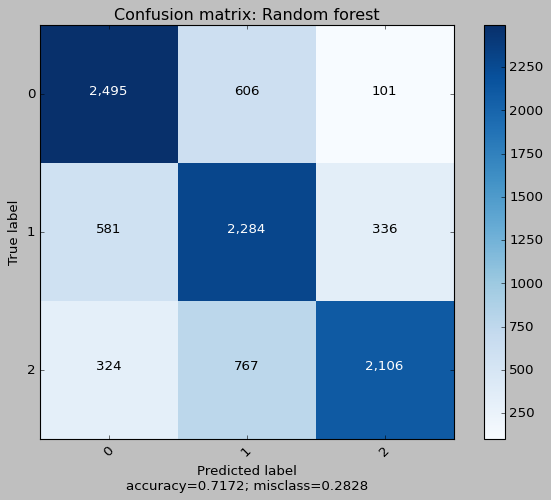

In [ ]:
rf = rforest_classifier(X_train, X_test, y_train, y_test)

[0 0 0 ... 0 2 1]
Accuracy: 0.59417 
Balanced accuracy: 0.59417
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      3202
           1       0.52      0.54      0.53      3201
           2       0.64      0.62      0.63      3197

    accuracy                           0.59      9600
   macro avg       0.60      0.59      0.59      9600
weighted avg       0.60      0.59      0.59      9600



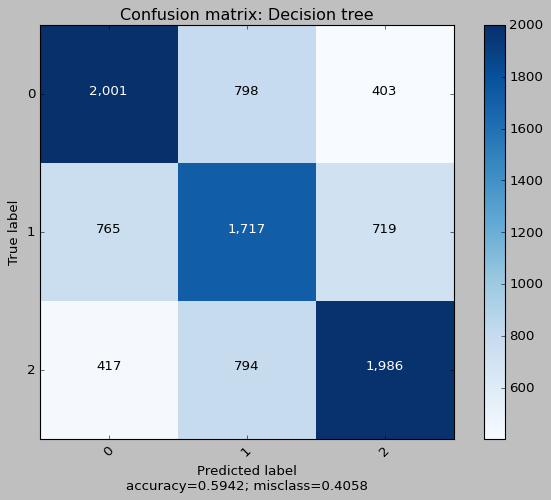

In [ ]:
dt = dtree_classifier(X_train, X_test, y_train, y_test)

Accuracy: 0.7151 
Balanced accuracy: 0.71505
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3202
           1       0.59      0.81      0.68      3201
           2       0.87      0.59      0.70      3197

    accuracy                           0.72      9600
   macro avg       0.75      0.72      0.72      9600
weighted avg       0.75      0.72      0.72      9600



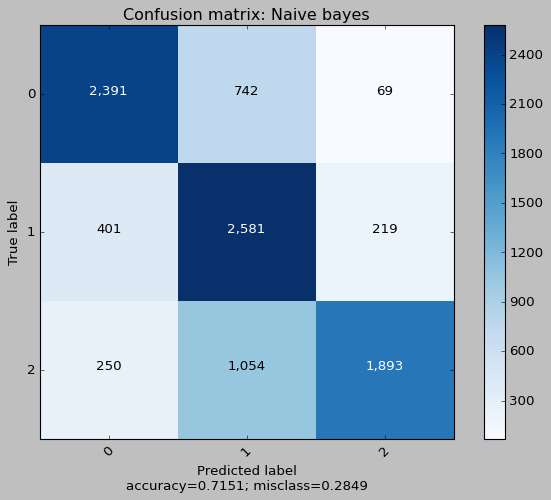

In [ ]:
nb = naive_bayes(X_train, X_test, y_train, y_test)

Accuracy: 0.76583 
Balanced accuracy: 0.76579
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3202
           1       0.68      0.76      0.72      3201
           2       0.85      0.69      0.76      3197

    accuracy                           0.77      9600
   macro avg       0.77      0.77      0.77      9600
weighted avg       0.77      0.77      0.77      9600



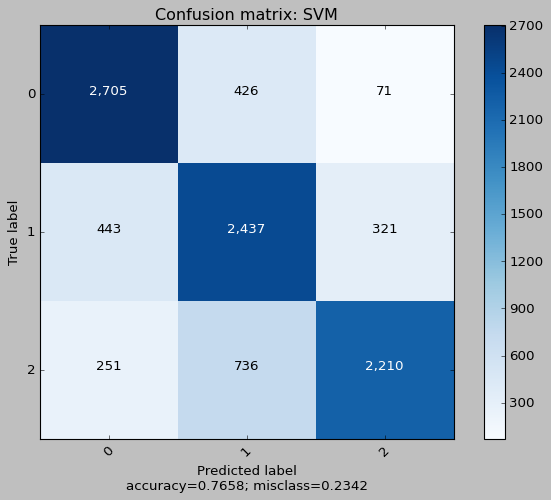

In [ ]:
s_v_m=svm(X_train, X_test, y_train, y_test)

Learning rate set to 0.095307
0:	learn: 1.0759264	total: 2.52s	remaining: 41m 54s
1:	learn: 1.0573432	total: 4.03s	remaining: 33m 31s
2:	learn: 1.0401860	total: 5.51s	remaining: 30m 31s
3:	learn: 1.0269842	total: 7.03s	remaining: 29m 11s
4:	learn: 1.0149806	total: 8.52s	remaining: 28m 14s
5:	learn: 1.0031963	total: 10s	remaining: 27m 38s
6:	learn: 0.9920463	total: 11.5s	remaining: 27m 13s
7:	learn: 0.9826994	total: 13s	remaining: 26m 56s
8:	learn: 0.9741686	total: 14.5s	remaining: 26m 40s
9:	learn: 0.9658401	total: 16s	remaining: 26m 28s
10:	learn: 0.9583143	total: 17.6s	remaining: 26m 22s
11:	learn: 0.9508497	total: 19.1s	remaining: 26m 12s
12:	learn: 0.9446096	total: 20.6s	remaining: 26m 5s
13:	learn: 0.9383215	total: 22.1s	remaining: 25m 58s
14:	learn: 0.9325826	total: 23.6s	remaining: 25m 50s
15:	learn: 0.9270322	total: 25.1s	remaining: 25m 43s
16:	learn: 0.9215520	total: 26.6s	remaining: 25m 39s
17:	learn: 0.9161565	total: 28.2s	remaining: 25m 35s
18:	learn: 0.9116880	total: 29.7s

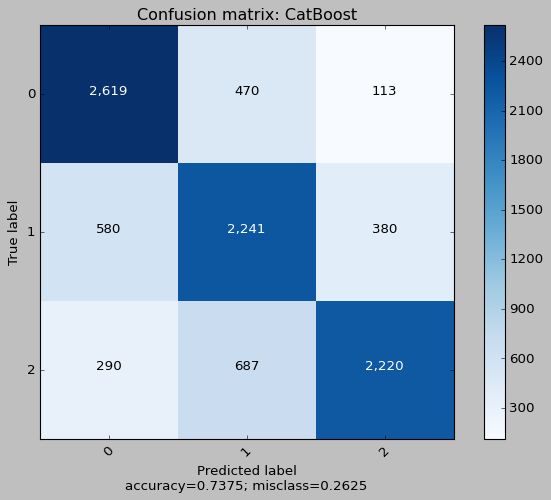

In [ ]:
cb = catboost(X_train, X_test, y_train, y_test)

Accuracy: 0.685 
Balanced accuracy: 0.68496
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      3202
           1       0.60      0.66      0.63      3201
           2       0.84      0.61      0.71      3197

    accuracy                           0.69      9600
   macro avg       0.70      0.68      0.69      9600
weighted avg       0.70      0.69      0.69      9600



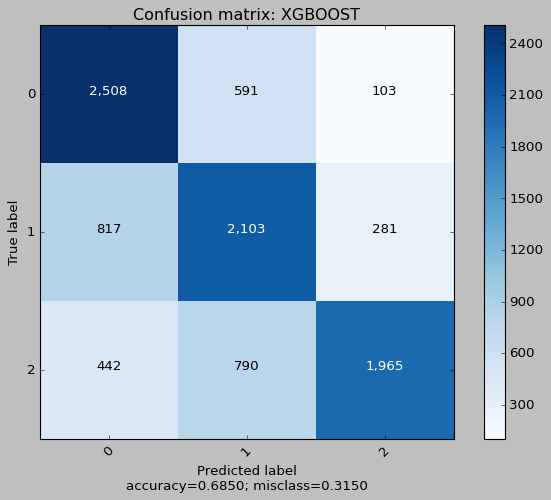

In [ ]:
xg = xgboost(X_train, X_test, y_train, y_test)

In [ ]:
xg

In [ ]:
del rf
del dt
del nb
del s_v_m
del cb
del xg

### WORD2VEC (classical ml on full, NN on 6000 samples)

In [ ]:
W2V_FILE = "w2v_trained.model"

In [ ]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE

def w2v_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def scatter(w2v_model):
  output_notebook()
  plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
      tools="pan,wheel_zoom,box_zoom,reset,hover",
      x_axis_type=None, y_axis_type=None, min_border=1)

  # getting a list of word vectors. limit to 10000. each is of 200 dimensions
  word_vectors = [w2v_model[w] for w in list(w2v_model.wv.vocab.keys())[:5000]]

  # dimensionality reduction. converting the vectors to 2d vectors
  tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
  tsne_w2v = tsne_model.fit_transform(word_vectors)

  # putting everything in a dataframe
  tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
  tsne_df['words'] = list(w2v_model.wv.vocab.keys())[:5000]

  # plotting. the corresponding word appears when you hover on the data point.
  plot_tfidf.scatter(x='x', y='y', source=tsne_df)
  hover = plot_tfidf.select(dict(type=HoverTool))
  hover.tooltips={"word": "@words"}
  show(plot_tfidf)

In [ ]:
df_train_w2v = df_train.copy()
df_test_w2v = df_test.copy()
df_train_w2v['text'] = df_train['text'].str.split()
df_test_w2v['text'] = df_test['text'].str.split()

Time taken to train word2vec model: 19.66762614250183


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



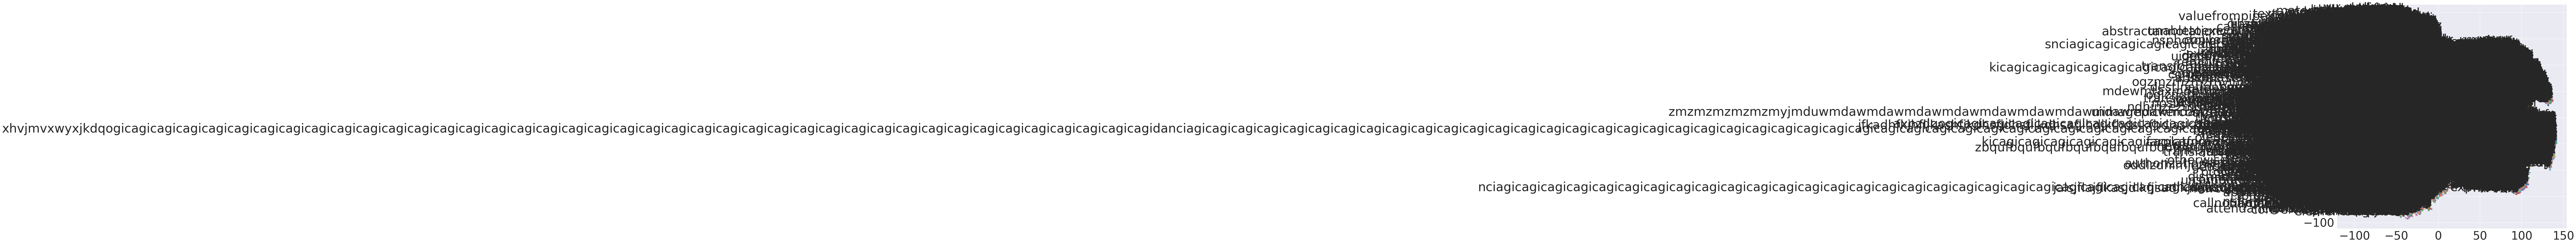

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE


w2v_data = df_test_w2v.text + df_train_w2v.text
start_time = time.time()
w2v_model = Word2Vec(w2v_data, min_count = 2, size = 1000, workers = 3, window = 3, sg = 1)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(W2V_FILE)
w2v_plot(w2v_model)

In [ ]:
w2v_model.most_similar("use") 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('supply', 0.7325257658958435),
 ('repair', 0.7244704961776733),
 ('duplication', 0.7188032865524292),
 ('workarounds', 0.7178133726119995),
 ('extremely', 0.7158184051513672),
 ('ugly', 0.7156966924667358),
 ('crazy', 0.7146044969558716),
 ('relatively', 0.7113208770751953),
 ('overcome', 0.7107505798339844),
 ('mainly', 0.707181453704834)]

In [ ]:
sg_w2v_model = Word2Vec.load(W2V_FILE)

In [ ]:
word2vec_filename = 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in df_train_w2v.iterrows():
      try:
        model_vector = (np.mean([sg_w2v_model[token] for token in row['text']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join([str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')
      except KeyError as e:
        print(e)
        continue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
word2vec_df = pd.read_csv(word2vec_filename)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(word2vec_df, df_train['target'], test_size=0.2, random_state=133)

Accuracy: 0.73542 
Balanced accuracy: 0.73538
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      3202
           1       0.65      0.72      0.69      3201
           2       0.83      0.66      0.74      3197

    accuracy                           0.74      9600
   macro avg       0.74      0.74      0.74      9600
weighted avg       0.74      0.74      0.74      9600



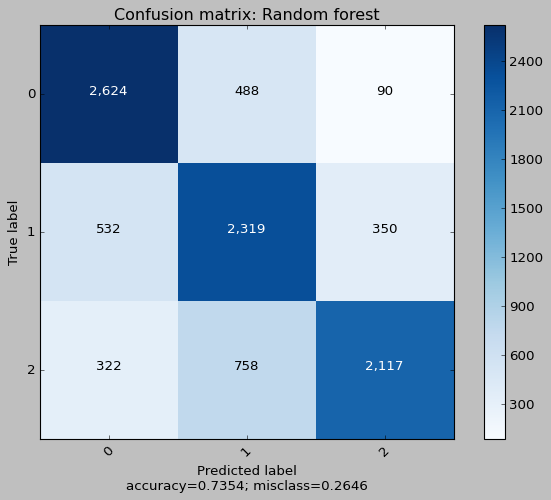

In [ ]:
rf = rforest_classifier(X_train, X_test, y_train, y_test)

[1 1 0 ... 2 1 1]
Accuracy: 0.58979 
Balanced accuracy: 0.5898
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3202
           1       0.52      0.51      0.51      3201
           2       0.61      0.62      0.61      3197

    accuracy                           0.59      9600
   macro avg       0.59      0.59      0.59      9600
weighted avg       0.59      0.59      0.59      9600



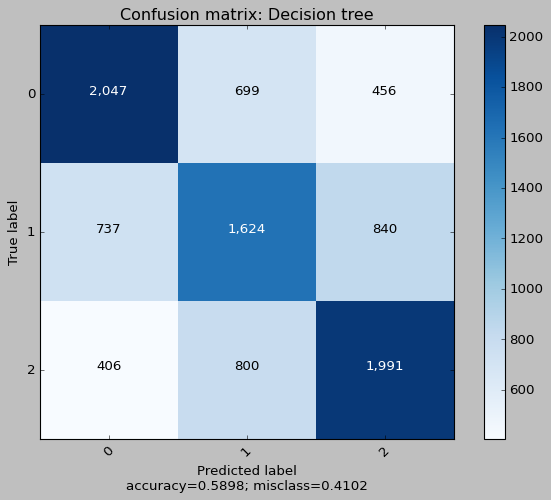

In [ ]:
dt = dtree_classifier(X_train, X_test, y_train, y_test)

Accuracy: 0.66042 
Balanced accuracy: 0.66041
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      3202
           1       0.61      0.54      0.57      3201
           2       0.69      0.68      0.68      3197

    accuracy                           0.66      9600
   macro avg       0.66      0.66      0.66      9600
weighted avg       0.66      0.66      0.66      9600



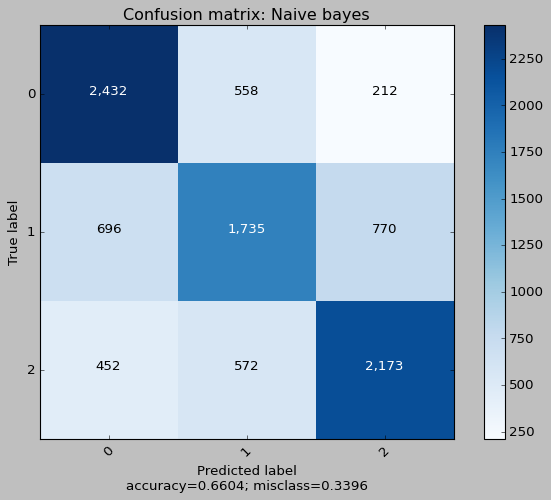

In [ ]:
nb = naive_bayes(X_train, X_test, y_train, y_test)

Accuracy: 0.76156 
Balanced accuracy: 0.76154
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3202
           1       0.69      0.73      0.71      3201
           2       0.82      0.72      0.77      3197

    accuracy                           0.76      9600
   macro avg       0.76      0.76      0.76      9600
weighted avg       0.76      0.76      0.76      9600



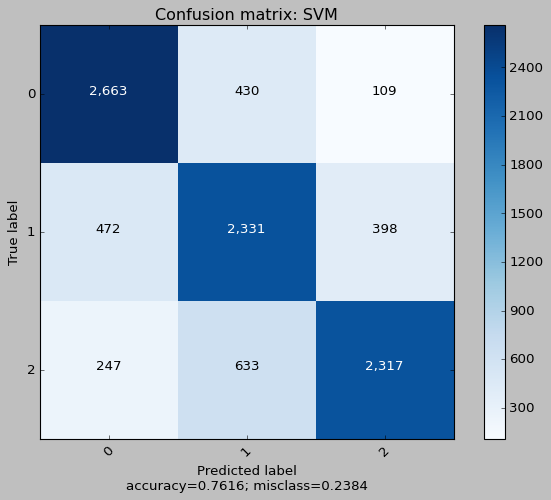

In [ ]:
s_v_m=svm(X_train, X_test, y_train, y_test)

Learning rate set to 0.095307
0:	learn: 1.0524748	total: 2.07s	remaining: 34m 28s
1:	learn: 1.0160107	total: 3.31s	remaining: 27m 34s
2:	learn: 0.9834502	total: 4.59s	remaining: 25m 25s
3:	learn: 0.9562565	total: 5.84s	remaining: 24m 13s
4:	learn: 0.9310940	total: 7.19s	remaining: 23m 51s
5:	learn: 0.9095413	total: 8.4s	remaining: 23m 11s
6:	learn: 0.8899571	total: 9.58s	remaining: 22m 39s
7:	learn: 0.8720618	total: 10.9s	remaining: 22m 27s
8:	learn: 0.8564875	total: 12.1s	remaining: 22m 9s
9:	learn: 0.8431979	total: 13.4s	remaining: 22m 4s
10:	learn: 0.8305270	total: 14.7s	remaining: 22m 1s
11:	learn: 0.8174537	total: 16.1s	remaining: 22m 4s
12:	learn: 0.8067619	total: 17.4s	remaining: 22m 4s
13:	learn: 0.7964231	total: 18.9s	remaining: 22m 13s
14:	learn: 0.7877474	total: 20.3s	remaining: 22m 13s
15:	learn: 0.7794308	total: 21.8s	remaining: 22m 20s
16:	learn: 0.7718515	total: 23s	remaining: 22m 11s
17:	learn: 0.7648871	total: 24.3s	remaining: 22m 7s
18:	learn: 0.7586641	total: 25.5s	r

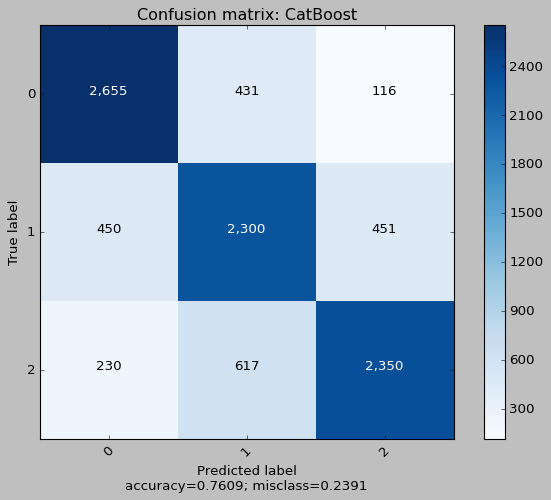

In [ ]:
cb = catboost(X_train, X_test, y_train, y_test)

Accuracy: 0.73646 
Balanced accuracy: 0.73644
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      3202
           1       0.67      0.67      0.67      3201
           2       0.78      0.72      0.75      3197

    accuracy                           0.74      9600
   macro avg       0.74      0.74      0.74      9600
weighted avg       0.74      0.74      0.74      9600



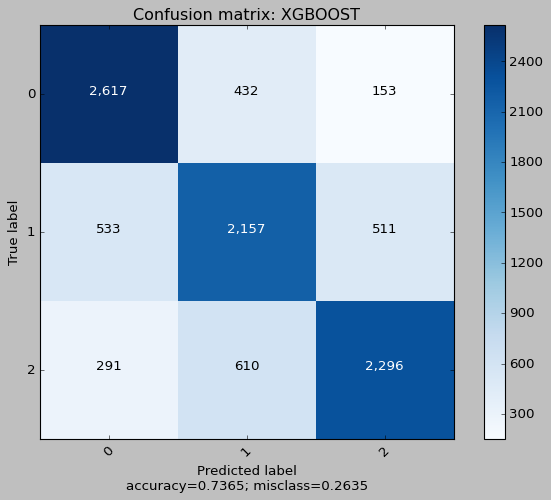

In [ ]:
xg = xgboost(X_train, X_test, y_train, y_test)

In [ ]:
voting_classifier(dt, rf, xg, cb, X_train, X_test, y_train, y_test)

In [ ]:
from os import listdir
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def get_weight_matrix(embedding, vocab):
 # total vocabulary size plus 0 for unknown words
 vocab_size = len(vocab) + 1
 # define weight matrix dimensions with all 0
 weight_matrix = zeros((vocab_size, 100))
 # step vocab, store vectors using the Tokenizer's integer mapping
 for word, i in vocab.items():
  weight_matrix[i] = embedding.get(word)
 return weight_matrix
  
s = int(len(df_train) * 0.8)
train_docs = df_train[:s]['text']
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = df_train[:s]['target']

# load all test reviews

test_docs = df_train[s:]['text']
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = df_train[s:]['target']

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

# load embedding from file
raw_embedding = w2v_data
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 298, 100)          2384100   
_________________________________________________________________
conv1d (Conv1D)              (None, 294, 128)          64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 147, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 18816)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 18817     
Total params: 2,467,045
Trainable params: 82,945
Non-trainable params: 2,384,100
_________________________________________________________________
None
Epoch 1/10
150/150 - 8s - loss: nan - accuracy: 0.3438
Epoch 2/10
150/150 - 8s - loss: nan - accuracy:

Мы пытались склепать свою нейронку, но что-то пошло не так. Завести удалось, но очевидно налажали с архитектурой. 

In [ ]:
del rf
del dt
del nb
del s_v_m
del cb
del xg

### One Hot(girl) Encoding ( full dataset)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(max_features=7000)
one_hot_girl_vectorized = countVectorizer.fit_transform(df_train['text'])

In [ ]:
test_vectorized = countVectorizer.fit_transform(df_test['text'])

In [ ]:
test_predicted = 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_girl_vectorized, df_train['target'], test_size=0.2, random_state=133)

Accuracy: 0.72021 
Balanced accuracy: 0.72017
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3202
           1       0.61      0.75      0.67      3201
           2       0.85      0.65      0.73      3197

    accuracy                           0.72      9600
   macro avg       0.74      0.72      0.72      9600
weighted avg       0.74      0.72      0.72      9600



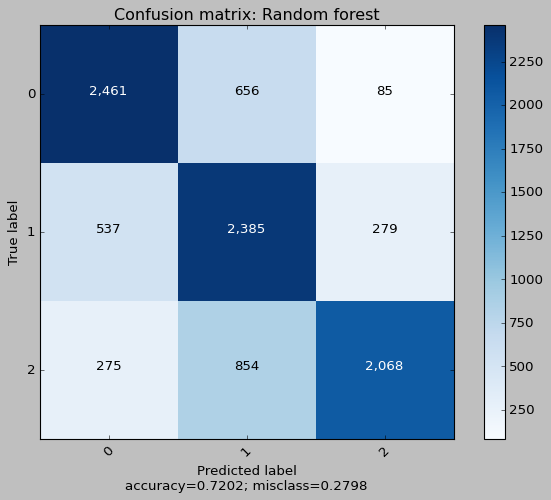

In [ ]:
rf = rforest_classifier(X_train, X_test, y_train, y_test)

[1 0 0 ... 0 1 0]
Accuracy: 0.60625 
Balanced accuracy: 0.60626
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3202
           1       0.52      0.55      0.54      3201
           2       0.66      0.63      0.65      3197

    accuracy                           0.61      9600
   macro avg       0.61      0.61      0.61      9600
weighted avg       0.61      0.61      0.61      9600



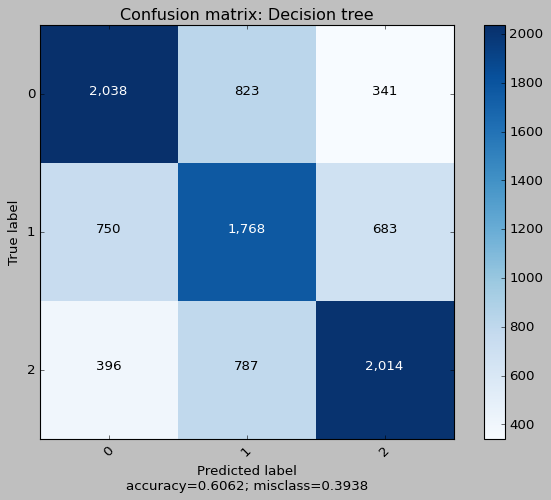

In [ ]:
dt = dtree_classifier(X_train, X_test, y_train, y_test)

Accuracy: 0.71302 
Balanced accuracy: 0.71297
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      3202
           1       0.59      0.80      0.68      3201
           2       0.85      0.60      0.70      3197

    accuracy                           0.71      9600
   macro avg       0.74      0.71      0.72      9600
weighted avg       0.74      0.71      0.72      9600



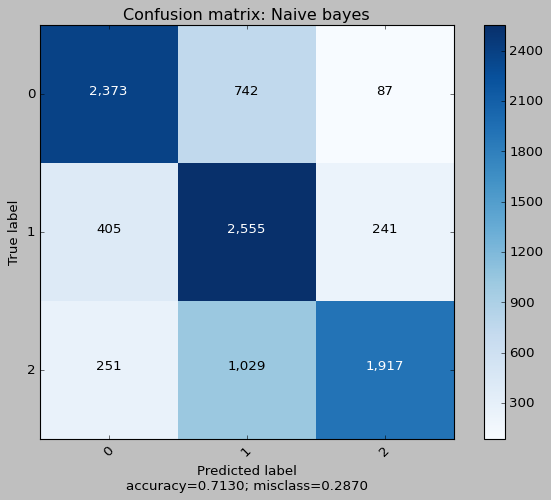

In [ ]:
nb = naive_bayes(X_train, X_test, y_train, y_test)

Accuracy: 0.75677 
Balanced accuracy: 0.75674
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3202
           1       0.66      0.76      0.71      3201
           2       0.83      0.70      0.76      3197

    accuracy                           0.76      9600
   macro avg       0.77      0.76      0.76      9600
weighted avg       0.77      0.76      0.76      9600



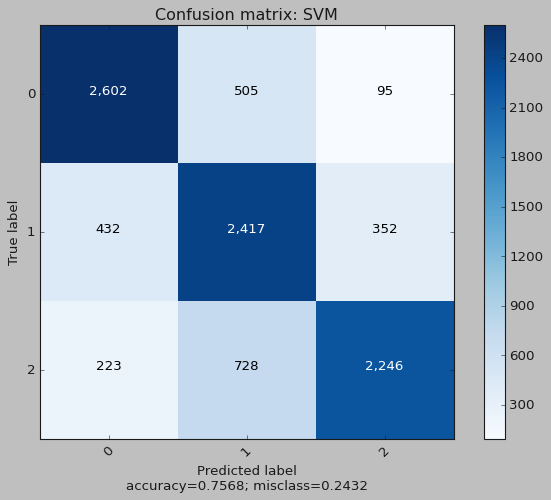

In [ ]:
s_v_m=svm(X_train, X_test, y_train, y_test)

Learning rate set to 0.095307
0:	learn: 1.0750824	total: 371ms	remaining: 6m 11s
1:	learn: 1.0549006	total: 677ms	remaining: 5m 38s
2:	learn: 1.0398035	total: 996ms	remaining: 5m 30s
3:	learn: 1.0249907	total: 1.32s	remaining: 5m 28s
4:	learn: 1.0131174	total: 1.63s	remaining: 5m 23s
5:	learn: 1.0015026	total: 1.94s	remaining: 5m 21s
6:	learn: 0.9921661	total: 2.27s	remaining: 5m 21s
7:	learn: 0.9827267	total: 2.58s	remaining: 5m 19s
8:	learn: 0.9739595	total: 2.88s	remaining: 5m 17s
9:	learn: 0.9656174	total: 3.22s	remaining: 5m 18s
10:	learn: 0.9587495	total: 3.52s	remaining: 5m 16s
11:	learn: 0.9516954	total: 3.87s	remaining: 5m 18s
12:	learn: 0.9458826	total: 4.19s	remaining: 5m 18s
13:	learn: 0.9398715	total: 4.52s	remaining: 5m 18s
14:	learn: 0.9335286	total: 4.84s	remaining: 5m 18s
15:	learn: 0.9275985	total: 5.18s	remaining: 5m 18s
16:	learn: 0.9227053	total: 5.48s	remaining: 5m 16s
17:	learn: 0.9176564	total: 5.78s	remaining: 5m 15s
18:	learn: 0.9128351	total: 6.13s	remaining:

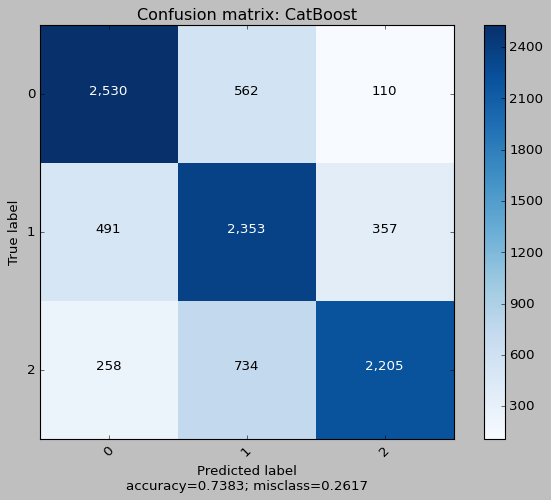

In [ ]:
cb = catboost(X_train, X_test, y_train, y_test)

Accuracy: 0.68583 
Balanced accuracy: 0.68579
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      3202
           1       0.59      0.70      0.64      3201
           2       0.85      0.61      0.71      3197

    accuracy                           0.69      9600
   macro avg       0.71      0.69      0.69      9600
weighted avg       0.71      0.69      0.69      9600



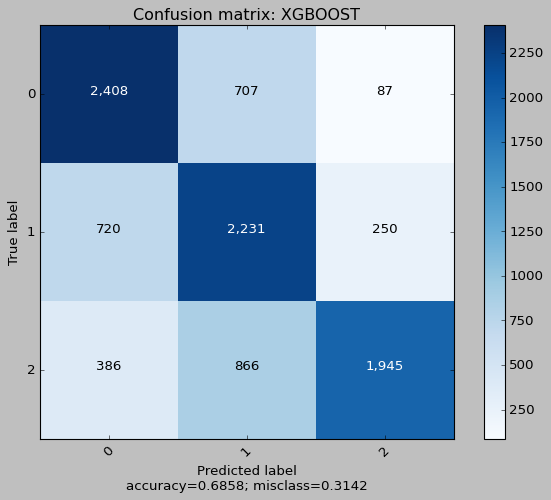

In [ ]:
xg = xgboost(X_train, X_test, y_train, y_test)

In [ ]:
voting_classifier(dt, rf, xg, cb, X_train, X_test, y_train, y_test)

### FastText

In [ ]:
from gensim.models.wrappers import FastText
from gensim.models.fasttext import FastText as FT_trainable

In [ ]:
def get_fasttext_vectors(corpus, model):    
    def get_vector(sentence):   
        vector = 0
        for w in sentence:
            try: 
                vector += model.wv[w]
            except:
                continue
        return vector
    out_corpus = np.stack(corpus.apply(lambda x: get_vector(x)).to_numpy())
    return out_corpus

In [ ]:
df_train_ft = df_train.copy()
df_test_ft = df_test.copy()
df_train_ft['text'] = df_train['text'].str.split()
df_test_ft['text'] = df_test['text'].str.split()

In [ ]:
ft = FT_trainable(size=300)
ft_sents = df_train_ft['text'] + df_test_ft['text']
ft.build_vocab(sentences=ft_sents)
ft.train(
    sentences=ft_sents, epochs=ft.epochs,
    total_examples=ft.corpus_count, total_words=ft.corpus_total_words
)

In [ ]:
ft.most_similar('docker')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('dockerdocker', 0.9940369725227356),
 ('ymldocker', 0.9902310967445374),
 ('dockerize', 0.9695113897323608),
 ('dockerized', 0.9693423509597778),
 ('dockerhub', 0.9635976552963257),
 ('logdocker', 0.9634462594985962),
 ('volumedocker', 0.9555840492248535),
 ('composedocker', 0.9543893933296204),
 ('dockerdockerfile', 0.9436763525009155),
 ('dockerfiles', 0.9235242605209351)]

In [ ]:
train_fasttext_vectors = get_fasttext_vectors(df_train_ft['text'], ft)

In [ ]:
print(train_fasttext_vectors)

[[  3.5689034   -3.6243608   -5.490495   ...  -0.392439     8.496287
    2.991089  ]
 [  4.9389615    5.8442802   -1.6731424  ...  -1.9013456   -5.9236298
   13.388904  ]
 [ 19.061693     0.24420404  -3.6612122  ...   4.9504256  -11.829277
    4.353117  ]
 ...
 [  6.4743705   -0.05459884   4.364603   ...   4.136019    -9.770535
   -7.755666  ]
 [ 17.774605   -15.455304    15.46705    ...   5.4113035   -2.616643
  -29.556686  ]
 [ -2.4256933    8.506647    -8.075971   ...   7.9383726   13.933599
    7.6080575 ]]


In [ ]:
w2v_plot(ft)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_fasttext_vectors, df_train['target'], test_size=0.2, random_state=133)

Accuracy: 0.71354 
Balanced accuracy: 0.71352
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      3202
           1       0.64      0.66      0.65      3201
           2       0.77      0.69      0.73      3197

    accuracy                           0.71      9600
   macro avg       0.72      0.71      0.71      9600
weighted avg       0.72      0.71      0.71      9600



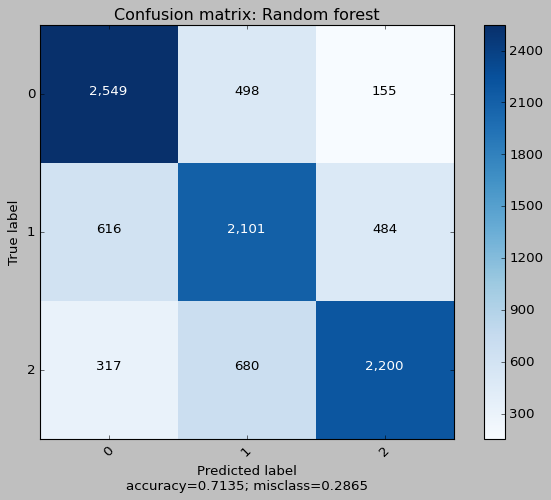

In [ ]:
rf = rforest_classifier(X_train, X_test, y_train, y_test)

[0 0 0 ... 2 0 1]
Accuracy: 0.58104 
Balanced accuracy: 0.58105
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      3202
           1       0.51      0.51      0.51      3201
           2       0.62      0.61      0.62      3197

    accuracy                           0.58      9600
   macro avg       0.58      0.58      0.58      9600
weighted avg       0.58      0.58      0.58      9600



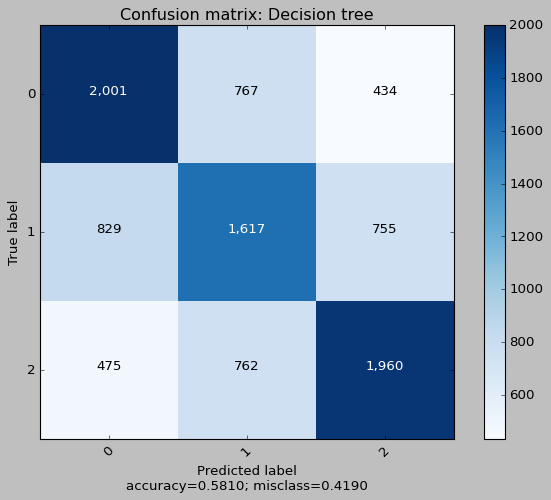

In [ ]:
dt = dtree_classifier(X_train, X_test, y_train, y_test)

Accuracy: 0.64208 
Balanced accuracy: 0.64206
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      3202
           1       0.60      0.54      0.57      3201
           2       0.70      0.61      0.65      3197

    accuracy                           0.64      9600
   macro avg       0.64      0.64      0.64      9600
weighted avg       0.64      0.64      0.64      9600



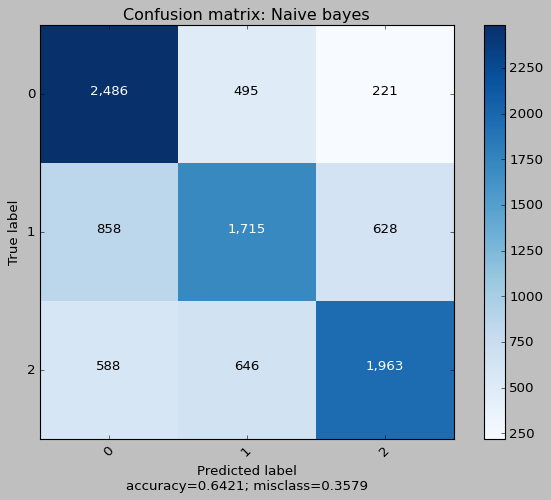

In [ ]:
nb = naive_bayes(X_train, X_test, y_train, y_test)

Accuracy: 0.74083 
Balanced accuracy: 0.7408
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3202
           1       0.65      0.73      0.69      3201
           2       0.83      0.68      0.75      3197

    accuracy                           0.74      9600
   macro avg       0.75      0.74      0.74      9600
weighted avg       0.75      0.74      0.74      9600



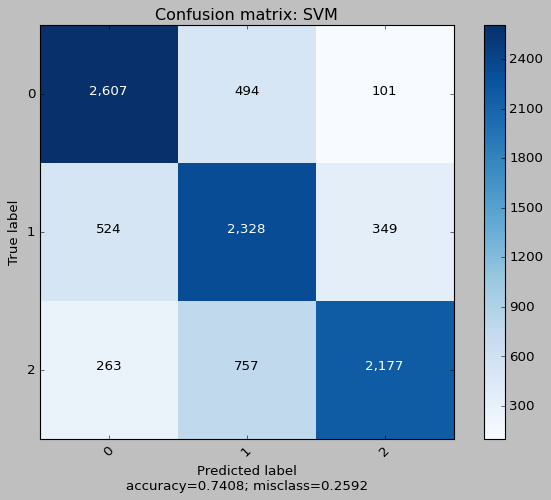

In [ ]:
s_v_m=svm(X_train, X_test, y_train, y_test)

Learning rate set to 0.095307
0:	learn: 1.0528290	total: 692ms	remaining: 11m 31s
1:	learn: 1.0178097	total: 1.06s	remaining: 8m 48s
2:	learn: 0.9858327	total: 1.45s	remaining: 8m 2s
3:	learn: 0.9595067	total: 1.84s	remaining: 7m 38s
4:	learn: 0.9353779	total: 2.23s	remaining: 7m 23s
5:	learn: 0.9154952	total: 2.59s	remaining: 7m 9s
6:	learn: 0.8956002	total: 3s	remaining: 7m 5s
7:	learn: 0.8800338	total: 3.39s	remaining: 7m
8:	learn: 0.8652471	total: 3.78s	remaining: 6m 56s
9:	learn: 0.8522918	total: 4.19s	remaining: 6m 54s
10:	learn: 0.8403972	total: 4.56s	remaining: 6m 50s
11:	learn: 0.8296089	total: 4.95s	remaining: 6m 47s
12:	learn: 0.8191140	total: 5.33s	remaining: 6m 44s
13:	learn: 0.8106353	total: 5.71s	remaining: 6m 42s
14:	learn: 0.8020836	total: 6.08s	remaining: 6m 38s
15:	learn: 0.7952550	total: 6.46s	remaining: 6m 37s
16:	learn: 0.7885233	total: 6.84s	remaining: 6m 35s
17:	learn: 0.7813599	total: 7.25s	remaining: 6m 35s
18:	learn: 0.7748780	total: 7.63s	remaining: 6m 33s
1

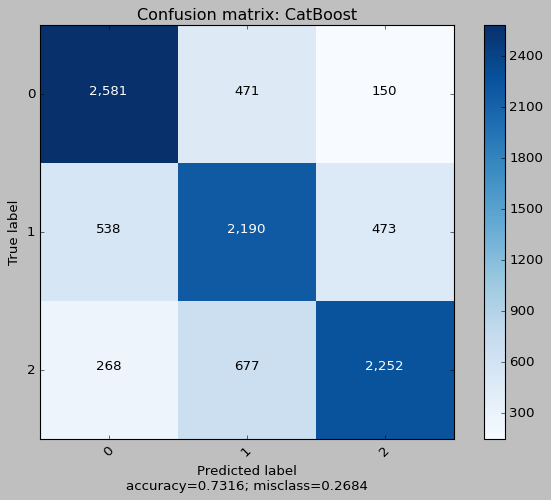

In [ ]:
cb = catboost(X_train, X_test, y_train, y_test)

Accuracy: 0.70917 
Balanced accuracy: 0.70915
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      3202
           1       0.63      0.66      0.65      3201
           2       0.78      0.68      0.72      3197

    accuracy                           0.71      9600
   macro avg       0.71      0.71      0.71      9600
weighted avg       0.71      0.71      0.71      9600



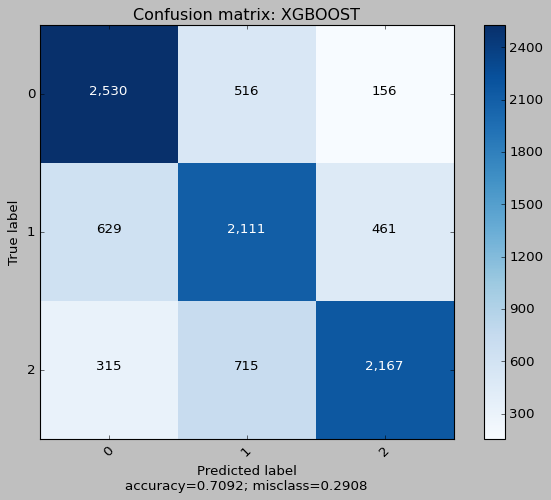

In [ ]:
xg = xgboost(X_train, X_test, y_train, y_test)

In [ ]:
voting_classifier(dt, rf, xg, cb, X_train, X_test, y_train, y_test)

Learning rate set to 0.095307
0:	learn: 1.0528290	total: 430ms	remaining: 7m 9s
1:	learn: 1.0178097	total: 787ms	remaining: 6m 32s
2:	learn: 0.9858327	total: 1.19s	remaining: 6m 34s
3:	learn: 0.9595067	total: 1.58s	remaining: 6m 32s
4:	learn: 0.9353779	total: 1.97s	remaining: 6m 32s
5:	learn: 0.9154952	total: 2.33s	remaining: 6m 25s
6:	learn: 0.8956002	total: 2.72s	remaining: 6m 25s
7:	learn: 0.8800338	total: 3.09s	remaining: 6m 23s
8:	learn: 0.8652471	total: 3.48s	remaining: 6m 23s
9:	learn: 0.8522918	total: 3.88s	remaining: 6m 23s
10:	learn: 0.8403972	total: 4.26s	remaining: 6m 23s
11:	learn: 0.8296089	total: 4.65s	remaining: 6m 22s
12:	learn: 0.8191140	total: 5.04s	remaining: 6m 22s
13:	learn: 0.8106353	total: 5.42s	remaining: 6m 21s
14:	learn: 0.8020836	total: 5.78s	remaining: 6m 19s
15:	learn: 0.7952550	total: 6.17s	remaining: 6m 19s
16:	learn: 0.7885233	total: 6.56s	remaining: 6m 19s
17:	learn: 0.7813599	total: 6.97s	remaining: 6m 20s
18:	learn: 0.7748780	total: 7.35s	remaining: 

Саммари по ембеддингам. Лучшие результаты показали ансамбли и SVM. Decision tree оказалась совершенно неприменимой к данной задаче. Предполагается, что причиной является огромный датасет и неспособность единичного дерева его обработать, при том что Random forest, который по сути является ансамблем из решающих деревьев - показывает очень неплохие результаты, в сравнении с остальными алгоритмами. 

Алгоритмы обученные на данных, векторизованных через FastText, показали наилучшие результаты, здесь даже decision tree не так ужасен как в остальных местах. Причину этому обосновать сложно, возможно вопрос алгоритма.

## NN on raw data (trained in 15000 samples)

INFO:filelock:Lock 139652193004792 acquired on /root/.cache/torch/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.0d87139f53a477d9f900f8a9020c367863079014bdaf2aa713f4b64cf1782655.lock


INFO:filelock:Lock 139652193004792 released on /root/.cache/torch/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.0d87139f53a477d9f900f8a9020c367863079014bdaf2aa713f4b64cf1782655.lock
INFO:filelock:Lock 139652194422968 acquired on /root/.cache/torch/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock


INFO:filelock:Lock 139652194422968 released on /root/.cache/torch/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

INFO:filelock:Lock 139652158626392 released on /root/.cache/torch/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock
/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:380: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning:

Please also save or load the state of the optimizer when saving or loading the scheduler.



INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



Accuracy: 0.75633 
Balanced accuracy: 0.75636
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       983
           1       0.70      0.74      0.72      1049
           2       0.80      0.68      0.74       968

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



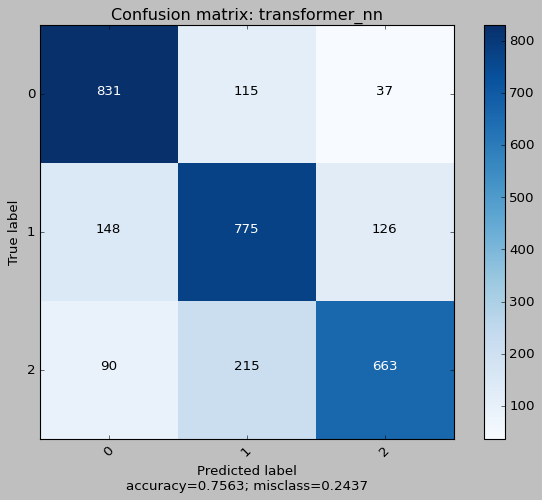

In [ ]:
from simpletransformers.classification import ClassificationModel
import logging
from tqdm import tqdm
tqdm(disable=True, total=0)

train_df = df_train_nn[['text','target']]
size=int(len(train_df) * 0.8)
X_y_train = train_df[:size]
X_y_test = train_df[size:]

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True})

model.train_model(X_y_train)

predictions = model.predict(X_y_test['text'].array)

print("Accuracy:", round(metrics.accuracy_score(X_y_test['target'], predictions[0]), 5),
      '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(X_y_test['target'], predictions[0]), 5))
print(metrics.classification_report(X_y_test['target'], predictions[0]))   
style.use('classic')

plot_confusion_matrix(metrics.confusion_matrix(X_y_test['target'], predictions[0]),
                target_names=['0', '1', '2'], title="transformer_nn",
                normalize=False)



Очень крутая нейронка.
Ради интереса и разнообразия, решили обучать ее на тексте, а не на векторе. 

На 15к обучалась почти 6 часов, пробовали на 30 - но колаб вылетает с концами. Есть уверенность, что при наличии мощностей - эта нейронка может выдать минимум 0,85 точности. 

In [ ]:
result = s_v_m.predict(test_vectorized)

In [ ]:
df = pd.DataFrame(result)
df.to_csv("prediction.csv")